# Selfie Project

This project for the Lede program 2021, should demonstrate what we learned this week in webscraping and html & Javascript.

## Wikipedia page to scrape

There were no readily available datasets to download for this topic, but I found a useful page on Wikipedia, where a lot of those accidents were recorded and with the latest data coming from 2021. 

Source: [List of selfie-related injuries and deaths](https://en.wikipedia.org/wiki/List_of_selfie-related_injuries_and_deaths)

## Reading the web page into Python

In [1]:
# importing the necessary libraries 
import pandas as pd
import numpy as np
import requests
import matplotlib
from bs4 import BeautifulSoup

In [2]:
# fetch web page from the URL and store the result in a "response" object called r
# response object has a text attribute, which contains the same HTML code from our web browser

r = requests.get('https://en.wikipedia.org/wiki/List_of_selfie-related_injuries_and_deaths')

In [3]:
# print the first 500 characters of the HTML
print(r.text[0:500])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of selfie-related injuries and deaths - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1ae4ba33-e485


### Parsing the HTML using Beautiful Soup

In [4]:
# parse the HTML (stored in r.text) into a special object called soup that the Beautiful Soup library understands
soup = BeautifulSoup(r.text, 'html.parser')

In [5]:
# finds the title tag
soup.title

<title>List of selfie-related injuries and deaths - Wikipedia</title>

In [6]:
# find how many table tags exist --> There are 2 tables on that page
len(soup.find_all('table'))

2

### Ask Beautiful Soup to find all of the records


In [7]:
# find where the data you want resides (in the table tag)
sp_table = soup.find_all('table')

In [8]:
# look at the 2 tables and find out which one has the needed data: table[0] 
#sp_table[0]

In [9]:
# save it as the new soup
sp_table = sp_table[0]

In [10]:
# find_all tr (table rows)

sp_trs = sp_table.find_all('tr')

In [11]:
# separate the first tr tag row for the header
sp_th = sp_trs[0].find_all('th')
sp_header = []
for th in sp_th:
    sp_header.append(th.text.strip())

In [12]:
sp_header

['Date', 'Country', 'Injuries/Casualties', 'Type', 'Description', 'Source(s)']

In [13]:
# take a look at the html structure for on row in the table
sp_trs[1] 

<tr>
<td><span data-sort-value="000000002011-10-15-0000" style="white-space:nowrap">15 October 2011</span>
</td>
<td>United States
</td>
<td>3
</td>
<td>Transport
</td>
<td>Three teenagers (two sisters and a friend) were killed by a train while posing for a selfie that was found on their phone. Shortly before, they posted the message "Standing right by a train ahaha this is awesome!!!!" to <a href="/wiki/Facebook" title="Facebook">Facebook</a>.
</td>
<td><sup class="reference" id="cite_ref-8"><a href="#cite_note-8">[8]</a></sup><sup class="reference" id="cite_ref-9"><a href="#cite_note-9">[9]</a></sup>
</td></tr>

In [14]:
# for each tr, find tds then for each td get text inside, then save to new array
sp_list = []
for tr in sp_trs[1:]:
    tds = tr.find_all('td')
    tr_list = []
    for (i, td) in enumerate(tds):
        # if it's the sixth column, get the citation number
        if(i == 5):
            # this temporary list is only created for each row, 
            # and only when we reach the sixth column
            temp_list = []
            for item in td.find_all('sup'):
                temp_list.append(item.get('id'))
            tr_list.append(temp_list)
        else:
            tr_list.append(td.text.strip())
    sp_list.append(tr_list)

### Building the dataset

#### Creating a dataframe without the \n

In [15]:
# removing all the \n from the data header
# sp_header = [item.strip() for item in sp_header if str(item)]

In [16]:
# applying a tabular data structure using pandas

sp_df = pd.DataFrame(sp_list, columns=sp_header)
sp_df

,Date,Country,Injuries/Casualties,Type,Description,Source(s)
0,15 October 2011,United States,3,Transport,Three teenagers (two sisters and a friend) wer...,"[cite_ref-8, cite_ref-9]"
1,March 2014,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...,[cite_ref-10]
2,March 2014,Russia,1,Transport,A train driver saw two people near the train t...,[cite_ref-11]
3,April 2014,United States,1,Transport,A 32-year-old woman from North Carolina was dr...,"[cite_ref-12, cite_ref-13]"
4,22 April 2014,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...,[cite_ref-14]
...,...,...,...,...,...,...
183,12 January 2020,Australia,1,Fall,"A 21-year-old woman from Lincoln, England, fel...",[cite_ref-218]
184,30 April 2020,Turkey,1,Fall,A 31-year-old resident from Kazakhstan fell fr...,[cite_ref-219]
185,12 December 2020,Australia,1,Fall,A 38-year-old woman from North Victoria fell 8...,[cite_ref-220]
186,12 January 2021,Slovenia,1,Transport,"A fatal accident in Maribor, Slovenia happened...",[cite_ref-221]


#### Converting the data types of the dataframe

In [17]:
# convert the date column to datetime format and overwrite the existing column
sp_df['Date'] = pd.to_datetime(sp_df['Date'])

# convert casualty numbers as integer
sp_df['Injuries/Casualties'] = sp_df['Injuries/Casualties'].astype(int)

# convert the text columns as strings
#sp_df[['Country', 'Type', 'Description']] = sp_df[['Country', 'Type', 'Description']].astype(str) --> does not work?? loc also not working
# sp_df['Country'] = sp_df['Country'].astype(str) does not remove the /n

In [18]:
# removing all the \n from the columns

# sp_df['Country']=sp_df['Country'].replace({'\n': ''}, regex=True)
# sp_df['Type']=sp_df['Type'].replace({'\n': ''}, regex=True)
# sp_df['Description']=sp_df['Description'].replace({'\n': ''}, regex=True)

# instead of citation number the whole html text will appear
# sp_df['Source(s)']=sp_df['Source(s)'].astype(str) 

# # sp_df['Source(s)'] = [foo.get('id') for foo in sp_df['Source(s)']]
# for index, row in sp_df.iterrows():
#     sources = row['Source(s)']
#     for source in sources:
#         print(source.get('id'))

## Find all the corresponding links (work in progress)

In [19]:
links = soup.find_all('li', id=lambda x: x and x.startswith('cite_note-'))
rows=[]
for link in links:
    # create a new dictionary with cite_id and hrefs
    # while creating cite id, replace 'note' with 'ref' for matching purposes
    new_dict = {'cite_id': link.get('id').replace('note','ref')}
    hrefs = link.find_all('a')
    link_list = []
    for ref in hrefs[1:]:
        link_list.append(ref['href'])
    new_dict['links'] = link_list
    rows.append(new_dict)

In [20]:
# convert it into a dataframe
import pandas as pd
linklist = pd.DataFrame(rows)
linklist

,cite_id,links
0,cite_ref-1,[http://www.cnn.com/2014/12/12/tech/twitter-se...
1,cite_ref-2,[https://www.google.ie/trends/2014/story/selfi...
2,cite_ref-3,[https://crashstats.nhtsa.dot.gov/Api/Public/V...
3,cite_ref-4,[https://www.washingtonpost.com/local/traffica...
4,cite_ref-:1-5,"[#cite_ref-:1_5-1, https://www.washingtonpost...."
...,...,...
217,cite_ref-218,[https://www.bbc.com/news/uk-england-lincolnsh...
218,cite_ref-219,[https://www.newschain.uk/news/woman-falls-her...
219,cite_ref-220,[https://www.theage.com.au/national/victoria/d...
220,cite_ref-221,[https://www.vecer.com/kronika/maribor-vlak-tr...


In [21]:
# we need to expand the first dataframe to merge it: explode()
sp_df= sp_df.explode('Source(s)')

In [22]:
# merge the corresponding links

sp_df= pd.merge(left=sp_df, right=linklist, left_on='Source(s)', right_on='cite_id', how='left')


In [23]:
sp_df= sp_df.explode('links')

In [24]:
# go to the links find every item there and join the list and drop the items without links, articles withouth links
sp_df = (sp_df.groupby(['Date', 'Country', 'Injuries/Casualties', 'Type', 'Description'])\
    .agg({'links': lambda x: ",".join(x.dropna())})
    .reset_index())

In [25]:
sp_df.head(5)

,Date,Country,Injuries/Casualties,Type,Description,links
0,2011-10-15,United States,3,Transport,Three teenagers (two sisters and a friend) wer...,https://www.up.com/aboutup/community/inside_tr...
1,2014-03-01,Russia,1,Transport,A train driver saw two people near the train t...,"https://orsk.ru/news/86935#,https://web.archiv..."
2,2014-03-01,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...,http://www.thelocal.es/20140318/young-man-dies...
3,2014-04-01,United States,1,Transport,A 32-year-old woman from North Carolina was dr...,https://www.independent.co.uk/news/world/ameri...
4,2014-04-22,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...,https://www.theweek.co.uk/64328/selfie-deaths-...


## Export the dataset to a CSV file

In [26]:
# use pandas save it as a csv
sp_df.to_csv('scrapeddata.csv', index=False, encoding='utf-8')

## Exploratory Data Analysis

This is the step to find interesting patterns or a storyline from the data.

In [27]:
# saving our final scraped dataset as df for common usage
df = sp_df

In [28]:
# To display the top 5 rows
df.head(5)

,Date,Country,Injuries/Casualties,Type,Description,links
0,2011-10-15,United States,3,Transport,Three teenagers (two sisters and a friend) wer...,https://www.up.com/aboutup/community/inside_tr...
1,2014-03-01,Russia,1,Transport,A train driver saw two people near the train t...,"https://orsk.ru/news/86935#,https://web.archiv..."
2,2014-03-01,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...,http://www.thelocal.es/20140318/young-man-dies...
3,2014-04-01,United States,1,Transport,A 32-year-old woman from North Carolina was dr...,https://www.independent.co.uk/news/world/ameri...
4,2014-04-22,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...,https://www.theweek.co.uk/64328/selfie-deaths-...


In [29]:
# To display the bottom 5 rows
df.tail(5) 

,Date,Country,Injuries/Casualties,Type,Description,links
183,2020-01-12,Australia,1,Fall,"A 21-year-old woman from Lincoln, England, fel...",https://www.bbc.com/news/uk-england-lincolnshi...
184,2020-04-30,Turkey,1,Fall,A 31-year-old resident from Kazakhstan fell fr...,https://www.newschain.uk/news/woman-falls-her-...
185,2020-12-12,Australia,1,Fall,A 38-year-old woman from North Victoria fell 8...,https://www.theage.com.au/national/victoria/da...
186,2021-01-12,Slovenia,1,Transport,"A fatal accident in Maribor, Slovenia happened...",https://www.vecer.com/kronika/maribor-vlak-trc...
187,2021-05-16,Indonesia,9,Drowned,A boat overloaded with 20 people in a reservoi...,https://www.thejakartapost.com/news/2021/05/16...


In [30]:
# Checking the data type
df.dtypes

Date                   datetime64[ns]
Country                        object
Injuries/Casualties             int64
Type                           object
Description                    object
links                          object
dtype: object

In [31]:
# Dropping irrelevant columns: for now we will drop the source column
df = df.drop('links',axis=1)
df.head(5)

,Date,Country,Injuries/Casualties,Type,Description
0,2011-10-15,United States,3,Transport,Three teenagers (two sisters and a friend) wer...
1,2014-03-01,Russia,1,Transport,A train driver saw two people near the train t...
2,2014-03-01,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...
3,2014-04-01,United States,1,Transport,A 32-year-old woman from North Carolina was dr...
4,2014-04-22,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...


In [32]:
# Rename columns for easier typing

df = df.rename(columns={'Injuries/Casualties': 'Persons'})

In [33]:
# Finding the null values: We have a complete dataset
print(df.isnull().sum())

Date           0
Country        0
Persons        0
Type           0
Description    0
dtype: int64


## Coming up with questions

##### Question
- In which year were the most accidents?
- Which year had the most casualties? 2014 really the year of selifes?
- Is there a seasonal trend? Summer more deaths?
- How did most people die?
- Which were the biggest accidents?
- Word analysis
- Which country had the most selfie deaths?

##### Further explorations

- Think about how to best visualize all that considering the sensitivity of deaths!
- To Do: Scrape the location spots: Where are the selfie danger areas? Hotspot Attraction more dangerous? Mumbai created No Selfie Zones for example.
- Scrape out the age and gender from the text

From Wiki: A 2018 study of news reports showed that there were 259 selfie deaths in 137 incidents reported globally between October 2011 and November 2017, with the highest occurrences in India, followed by Russia, United States, and Pakistan. The mean age was 23 years old, with male deaths outnumbering female about three to one.

- Request that dataset?



### Which year had the most accidents? Which month has the most accidents?

The United States Department of Transportation called 2014, the so-called "year of the selfie" as there were many accidents. Is that true?

In [34]:
# extracting the years and month from the Date column

import datetime
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df

,Date,Country,Persons,Type,Description,Year,Month
0,2011-10-15,United States,3,Transport,Three teenagers (two sisters and a friend) wer...,2011,10
1,2014-03-01,Russia,1,Transport,A train driver saw two people near the train t...,2014,3
2,2014-03-01,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...,2014,3
3,2014-04-01,United States,1,Transport,A 32-year-old woman from North Carolina was dr...,2014,4
4,2014-04-22,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...,2014,4
...,...,...,...,...,...,...,...
183,2020-01-12,Australia,1,Fall,"A 21-year-old woman from Lincoln, England, fel...",2020,1
184,2020-04-30,Turkey,1,Fall,A 31-year-old resident from Kazakhstan fell fr...,2020,4
185,2020-12-12,Australia,1,Fall,A 38-year-old woman from North Victoria fell 8...,2020,12
186,2021-01-12,Slovenia,1,Transport,"A fatal accident in Maribor, Slovenia happened...",2021,1


<AxesSubplot:title={'center':'Selfie Accidents by Year'}>

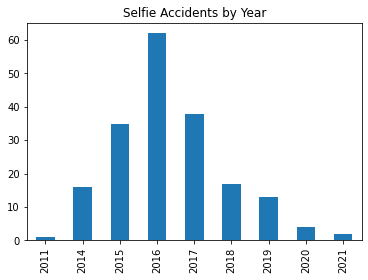

In [35]:
# use sort_index() to sort the x-axis

df.Year.value_counts().sort_index().plot(kind='bar', title="Selfie Accidents by Year")

<AxesSubplot:title={'center':'Selfie Accidents by Month'}>

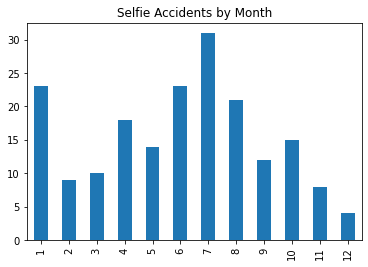

In [36]:
df.Month.value_counts().sort_index().plot(kind='bar', title="Selfie Accidents by Month")

There is a definite peak in the summer months for selfie deaths. Maybe because a lot of people go on vacation and travel to dangerous locations to take pictures. Or people take more pictures in general if the weather is better. What should be looked more into is why January has a peak.

### Why are there so many accidents in January?

In [37]:
df[df.Month==1]  

,Date,Country,Persons,Type,Description,Year,Month
17,2015-01-01,India,3,Transport,Three students aged 20 to 22 died trying to ta...,2015,1
18,2015-01-01,Russia,2,Other,Two young men died in the Ural Mountains after...,2015,1
19,2015-01-01,South Africa,1,Fall,A 21-year-old woman died after falling from No...,2015,1
52,2016-01-01,India,1,Transport,A 16-year-old boy was killed by a passenger tr...,2016,1
53,2016-01-05,Philippines,1,Fall,A 19-year-old student fell to her death from t...,2016,1
54,2016-01-07,Brazil,1,Fall,A 27-year-old man fell into the sea and died a...,2016,1
55,2016-01-09,India,1,Fall,A 20-year-old fell to his death while taking a...,2016,1
56,2016-01-09,India,2,Drowned,A 20-year-old college student drowned at Bands...,2016,1
114,2017-01-01,India,1,Transport,A 21-year-old engineering student died when he...,2017,1
115,2017-01-04,Pakistan,1,Drowned,"In Sukkur, Pakistan, a man fell into the Indus...",2017,1


There is no real reason for the peak in January and has not much to do with the month.

### Which year had the most casualties?

<AxesSubplot:title={'center':'Selfie Casualty Count by Year'}, xlabel='Year'>

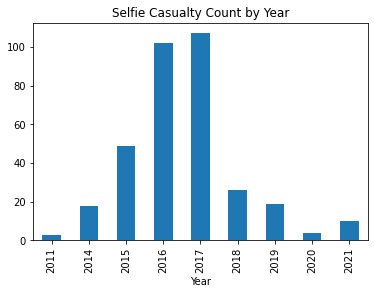

In [38]:
df.groupby(by='Year').Persons.sum().plot(kind='bar', title="Selfie Casualty Count by Year")

**Here it is really interesting to see while 2016 had the most accidents, 2017 was the deadliest year so far.**

## Downloading the csv for the first visualization

In [39]:
# create a dataframe

cas=df.groupby(by='Year').Persons.sum().sort_index().reset_index()
cas.rename(columns = {'Persons':'Casualty/Injury Count'}, inplace = True)
cas

,Year,Casualty/Injury Count
0,2011,3
1,2014,18
2,2015,49
3,2016,102
4,2017,107
5,2018,26
6,2019,19
7,2020,4
8,2021,10


In [40]:
#create a dataframe

acc=df.Year.value_counts().sort_index().reset_index()
acc.rename(columns = {'index':'Year', 'Year':'Accident Count'}, inplace = True)
acc

,Year,Accident Count
0,2011,1
1,2014,16
2,2015,35
3,2016,62
4,2017,38
5,2018,17
6,2019,13
7,2020,4
8,2021,2


In [41]:
# merge the 2 dataframes on year

df_cd = pd.merge(cas, acc, how='inner', on = 'Year')
df_cd

,Year,Casualty/Injury Count,Accident Count
0,2011,3,1
1,2014,18,16
2,2015,49,35
3,2016,102,62
4,2017,107,38
5,2018,26,17
6,2019,19,13
7,2020,4,4
8,2021,10,2


In [42]:
# use pandas save it as a csv
df_cd.to_csv('viz-1.csv', index=False, encoding='utf-8')

### Most common accident types

<AxesSubplot:>

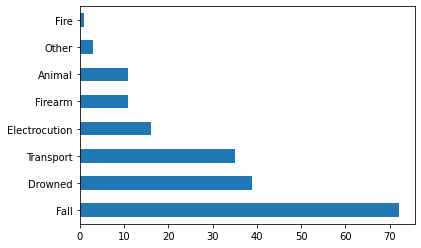

In [43]:
df.Type.value_counts().plot(kind='barh')

This aligns with the findings from [TechnologyReview](https://www.technologyreview.com/2016/11/15/156018/data-scientists-chart-the-tragic-rise-of-selfie-deaths/)

*The team also found that the most common cause of death was falling from a height. This reflects the penchant for people taking selfies at the edge of cliffs, at the top of tall structures, and so on.Water also accounts for a large number of deaths. And a significant number involve water and heights—things like jumping into the sea from a height and so on.*

In [44]:
# save as csv
df.Type.value_counts().reset_index().to_csv('viz-2.csv', index=False, encoding='utf-8')

<AxesSubplot:xlabel='Year,Type'>

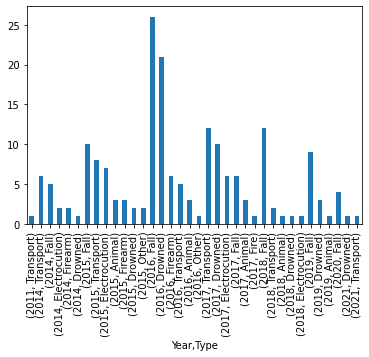

In [45]:
# plot the accident types by year

df.groupby(by='Year').Type.value_counts().plot(kind='bar')

In [46]:
df[(df.Year==2016) & (df.Type=='Fall')]

,Date,Country,Persons,Type,Description,Year,Month
53,2016-01-05,Philippines,1,Fall,A 19-year-old student fell to her death from t...,2016,1
54,2016-01-07,Brazil,1,Fall,A 27-year-old man fell into the sea and died a...,2016,1
55,2016-01-09,India,1,Fall,A 20-year-old fell to his death while taking a...,2016,1
59,2016-02-22,India,5,Fall,"Five people in Anjuna, Goa, fell off a cliff a...",2016,2
63,2016-03-12,"Hong Kong, China",1,Fall,A 30-year-old man fell off Lion Rock in Hong K...,2016,3
64,2016-04-05,India,1,Fall,A 16-year-old climbed a rock fountain at a zoo...,2016,4
66,2016-04-16,Brazil,1,Fall,A 27-year-old woman fell from a height of 35m ...,2016,4
68,2016-04-21,Brazil,1,Fall,"In Campos dos Goytacazes in Rio de Janeiro, a ...",2016,4
69,2016-04-26,India,1,Fall,"While taking a selfie, a 25-year-old fell off ...",2016,4
75,2016-06-18,United States,1,Fall,A 37-year-old EMS lieutenant of the New York C...,2016,6


### Which were the biggest accidents?

In [47]:
pd.set_option("display.max_colwidth", 1000)
df.sort_values('Persons', ascending=False).head(5)


,Date,Country,Persons,Type,Description,Year,Month
141,2017-07-16,India,48,Fire,"48 people were injured when standing too close to a burning bakery in Chennai, India, to take selfies. They repeatedly ignored warnings advising them to move away from the blaze.",2017,7
187,2021-05-16,Indonesia,9,Drowned,"A boat overloaded with 20 people in a reservoir in Central Java capsized when the passengers all suddenly moved to one side of the vessel, which was helmed by a 13-year-old, to take a group selfie. Nine of the passengers drowned, including two children.",2021,5
140,2017-07-10,India,8,Drowned,The boat capsized in Vena reservoir near Nagpur when a group of friends were taking selfie and broadcasting on Facebook live.,2017,7
22,2015-03-01,India,7,Drowned,"Seven youths drowned while taking selfies on Mangrul Lake near Kuhi, about 20 km from Nagpur, India. Their boat had tipped over as they were standing up to pose.",2015,3
77,2016-06-22,India,7,Drowned,"Seven people aged 16 to 31 were swept away and drowned while taking a selfie in the river Ganges in Kanpur, Uttar Pradesh, India. According to a police official, they had gone for a picnic at Kanpur Ganges Barrage when one of the party tried to take a selfie by standing on the edge of the barrage and tripped and fell into the Ganges. The river was already in spate due to rains in the region. The six others, in an attempt to save him, jumped into the river but were themselves swept away by the current.",2016,6


The accidents with the most injuries from [India Today](https://www.indiatoday.in/india/story/chennai-bakery-fire-onlookers-injured-selfie-craze-1024652-2017-07-17):

As many as 48 onlookers were injured, while standing too close to a bakery in Kodungaiyur that was engulfed in tall flames on Sunday.

Talking to eyewitnesses, India Today learned that despite announcements being made to the enclosing crowd- busy taking selfies at the site, that it was unsafe to be in such close vicinity, the onlookers did not budge.

**The most fatal accident was from 2021!**

### Which countries had the most selfie-related accidents?

In [48]:
df.Country.value_counts()

India               70
United States       18
Russia              14
Pakistan             8
Spain                5
Brazil               5
Philippines          5
Australia            5
United Kingdom       4
Sri Lanka            4
Croatia              4
Indonesia            4
Italy                3
Mexico               3
Colombia             3
Nepal                3
Germany              2
Thailand             2
China                2
Peru                 2
Turkey               2
Portugal             2
Hungary              1
Romania              1
Greece               1
Ireland              1
Slovenia             1
Serbia               1
South Africa         1
New Zealand          1
Hong Kong, China     1
Vietnam              1
Malaysia             1
Chile                1
Uganda               1
Kenya                1
Nigeria              1
Panama               1
Belgium              1
Oman                 1
Name: Country, dtype: int64

Like this [Washington Post](https://www.washingtonpost.com/news/worldviews/wp/2016/01/14/more-people-die-taking-selfies-in-india-than-anywhere-else-in-the-world/) reported in January 2016, India still remains the country with the most accidents nearly quadruple the count of the second country, which is the US.

In [49]:
# save the Top 10 countries as csv

df.Country.value_counts().head(10).reset_index().to_csv('viz-2-2.csv', index=False, encoding='utf-8')

### How do India's numbers look nowadays

In [50]:
df[df.Year>=2017].Country.value_counts()

India             23
United States      6
Australia          4
Russia             4
Pakistan           3
United Kingdom     3
Sri Lanka          3
Colombia           3
Mexico             2
Thailand           2
Indonesia          2
Brazil             2
Germany            2
Croatia            2
Uganda             1
Slovenia           1
Panama             1
Turkey             1
Hungary            1
Nigeria            1
New Zealand        1
Spain              1
Portugal           1
Italy              1
Ireland            1
Greece             1
Malaysia           1
Name: Country, dtype: int64

In [51]:
df[df.Year>2018].Country.value_counts()

Australia        3
Colombia         2
Pakistan         2
India            2
Thailand         1
Indonesia        1
Slovenia         1
Turkey           1
Germany          1
Italy            1
Spain            1
United States    1
Ireland          1
Uganda           1
Name: Country, dtype: int64

### A little Text Analysis (work in progress)

In [52]:
# Concatonating all the text in the description column and give me the first 1000 characters

all_text = df.Description.str.cat(sep=" ")
all_text[:1000]

'Three teenagers (two sisters and a friend) were killed by a train while posing for a selfie that was found on their phone. Shortly before, they posted the message "Standing right by a train ahaha this is awesome!!!!" to Facebook. A train driver saw two people near the train tracks in front of them and applied the emergency brake and sounded the horn. One of the people on the tracks moved away and the second, a 15-year-old, was attempting to take a selfie when a collision occurred with the train and they were killed. A 21-year-old man was electrocuted after climbing on top of a train to take a selfie with friends and touching a wire that (contrary to the assumptions of the group) turned out to be live. One of the friends was hospitalized in serious condition. A 32-year-old woman from North Carolina was driving when her vehicle veered across the center median, collided with a recycling truck, left the road, hit a tree, and burst into flames – moments after posting selfies online when sh

In [53]:
# clean the text

cleaned_text= all_text.replace("."," ").replace(","," ").replace("\n"," ").replace("("," ").replace(")"," ").replace("  "," ").lower()

cleaned_text[:1000]

'three teenagers two sisters and a friend were killed by a train while posing for a selfie that was found on their phone shortly before they posted the message "standing right by a train ahaha this is awesome!!!!" to facebook a train driver saw two people near the train tracks in front of them and applied the emergency brake and sounded the horn one of the people on the tracks moved away and the second a 15-year-old was attempting to take a selfie when a collision occurred with the train and they were killed a 21-year-old man was electrocuted after climbing on top of a train to take a selfie with friends and touching a wire that contrary to the assumptions of the group turned out to be live one of the friends was hospitalized in serious condition a 32-year-old woman from north carolina was driving when her vehicle veered across the center median collided with a recycling truck left the road hit a tree and burst into flames – moments after posting selfies online when she heard pharrell 

In [54]:
# creating a list with all the words

words=cleaned_text.split(" ")
words[:20]

['three',
 'teenagers',
 'two',
 'sisters',
 'and',
 'a',
 'friend',
 'were',
 'killed',
 'by',
 'a',
 'train',
 'while',
 'posing',
 'for',
 'a',
 'selfie',
 'that',
 'was',
 'found']

In [55]:
# import a new library

from collections import Counter #Counter needs to be capital C!!!

In [56]:
# count all the words an appearances

counts= Counter(words)

In [57]:
pd.DataFrame(counts.most_common(30), columns=("words","count"))

,words,count
0,a,548
1,the,362
2,to,216
3,in,216
4,and,154
5,of,152
6,was,143
7,selfie,142
8,while,105
9,on,93


The word train appears quite often as well as India.

In [58]:
df[df.Description.str.contains('train')]

,Date,Country,Persons,Type,Description,Year,Month
0,2011-10-15,United States,3,Transport,"Three teenagers (two sisters and a friend) were killed by a train while posing for a selfie that was found on their phone. Shortly before, they posted the message ""Standing right by a train ahaha this is awesome!!!!"" to Facebook.",2011,10
1,2014-03-01,Russia,1,Transport,"A train driver saw two people near the train tracks in front of them and applied the emergency brake and sounded the horn. One of the people on the tracks moved away and the second, a 15-year-old, was attempting to take a selfie when a collision occurred with the train and they were killed.",2014,3
2,2014-03-01,Spain,1,Electrocution,A 21-year-old man was electrocuted after climbing on top of a train to take a selfie with friends and touching a wire that (contrary to the assumptions of the group) turned out to be live. One of the friends was hospitalized in serious condition.,2014,3
5,2014-05-01,India,1,Transport,A 15-year-old boy was killed by a train while posing for a selfie on the tracks.,2014,5
9,2014-07-24,Belgium,1,Transport,A 12 year-old was with a second person taking selfies near a railway track. A train arrived and they went back down onto the train tracks to retrieve their bags. As they were waiting for the train to leave a second train approached that they did not hear. The second person jumped away before the train collided with them and the 12 year-old was hit by the train and killed.,2014,7
10,2014-08-01,India,1,Electrocution,"In Kerala, a 14-year-old boy was electrocuted while attempting to take a selfie on top of a stationary train.",2014,8
17,2015-01-01,India,3,Transport,"Three students aged 20 to 22 died trying to take a ""daredevil selfie"" close to an oncoming train on railway tracks of Mathura, near Kosikala.",2015,1
20,2015-02-04,India,1,Transport,"An Israeli man traveling on a train from Mumbai to Goa in India was attempting to take a selfie and fell out of the moving train, resulting in his death.",2015,2
21,2015-02-21,United States,1,Transport,"A man in Kalama, Washington, stepped out onto a railroad track to take a selfie with himself and a woman with a passing train in the background. The man misjudged which track the oncoming train was on and was struck and died at the scene.",2015,2
24,2015-04-01,Serbia,1,Transport,"A 22-year-old man was trying to recreate a scene from his favorite movie Barking at the Stars by running in front of a train, beating it and being hailed a hero. As he ran in front of the train, he tried to take a selfie to document the scene. He was killed instantly when the express train hit him at full speed in the village of Laćarak near the northern Serbian town of Sremska Mitrovica.",2015,4


In [59]:
# returns all numbers
import re

age = re.findall("[\d].", cleaned_text)

pd.DataFrame(Counter(age).most_common(30), columns=("Possible Age","Count"))

,Possible Age,Count
0,20,20
1,21,14
2,22,13
3,15,11
4,0,11
5,17,10
6,14,10
7,16,9
8,19,9
9,18,8


Most people involved were in their early 20s, but a more detailed analysis is necessary to assign the age and maybe gender to the cases.

In [60]:


gender_dict = {"male": ["gentleman", "man", "male","guy","he","him","men"],
               "female": ["female", "woman", "girl","women","she","her"]}

gender = re.findall(gender_dict, df.Description)

TypeError: unhashable type: 'dict'